<a href="https://colab.research.google.com/github/OoJackoO/MMAI894_Deep-Learning-Course-Project/blob/Amir-Notebook/MMAI894_Tomato_Disease_CLS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading & Loading the Dataset

In [1]:
# !pip install -q kaggle
# ! mkdir ~/content/drive/My Drive/Colab Notebooks/MMAI 894
# ! cp kaggle.json ~/content/drive/My Drive/Colab Notebooks/MMAI 894/
# ! chmod 600 ~/kaggle/kaggle.json

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

In [3]:
# Set the directory to where you want to have your dataset & jason authentication file
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset"
# %cd /content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/

In [4]:
# from kaggle.api.kaggle_api_extended import KaggleApi
# import zipfile

In [5]:
# # this will prompt you to upload the kaggle.json
# from google.colab import files

# files.upload() 

In [6]:
# # Check if your jason file is there and authentication is successful
# api = KaggleApi()
# api.authenticate()
# !ls -lha kaggle.json

In [7]:
# # ! kaggle competitions download google-smartphone-decimeter-challenge
# !kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources
# with zipfile.ZipFile('tomato-disease-multiple-sources.zip', 'r') as zip_ref:
#         zip_ref.extractall('./')

# Tomato Leaf Disease

In [8]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import glob
import cv2

from skimage.io import imread
from skimage.transform import resize
import random

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

import zipfile
from google.colab import drive
from PIL import ImageFile

import PIL
import PIL.Image

In [9]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/"

# Check if the directory exists and print the list of files and folders inside it
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print(files)
else:
    print("Directory does not exist.")

root_dir = "/content/drive/My Drive/" 
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/MMAI 894/Dataset/"
os.chdir(root_dir + project_folder)

Mounted at /content/drive
['kaggle.json', 'tomato-disease-multiple-sources.zip', 'new_file_in_working_directory.txt', 'train', 'valid']


In [10]:
!pwd

/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset


In [11]:
main_dir = os.getcwd()
train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'valid')

https://www.tensorflow.org/tutorials/load_data/images

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    class_names=os.listdir(train_dir),
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    )

Found 25910 files belonging to 11 classes.


In [13]:
Original_val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=24,
    validation_split=0.5,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    )

Found 6684 files belonging to 11 classes.
Using 3342 files for training.
Using 3342 files for validation.


In [14]:
val_ds = Original_val_ds[0]
test_ds = Original_val_ds[1]

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [16]:
class_names = train_ds.class_names
print(class_names)

['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


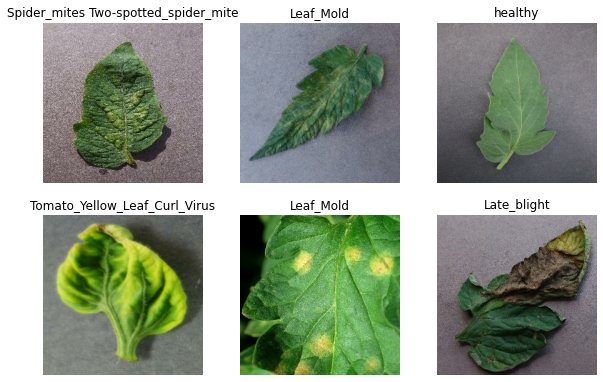

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [19]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

https://stackoverflow.com/questions/68191448/unknown-image-file-format-one-of-jpeg-png-gif-bmp-required

https://www.tensorflow.org/tutorials/load_data/images

https://stackoverflow.com/questions/65438156/tensorflow-keras-error-unknown-image-file-format-one-of-jpeg-png-gif-bmp-re

Need to check if the images are properly formatted and ready to be used.

In [21]:
from pathlib import Path
import imghdr

data_dir = train_dir
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png", 'jpg']
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Early_blight/early-blight-tomato-causal-agents-260nw-1746486380.jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Early_blight/EB_(976).jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Early_blight/220px-Alternaria_solani_-_leaf_lesions.jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Leaf_Mold/BM_(6).jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Leaf_Mold/BM_(7).jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Leaf_Mold/BM_(975).jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Leaf_Mold/BM_(976).jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Leaf_Mold/BM_(98).jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Leaf_Mold/607-155-1.jpg is not an image
/cont

In [35]:
import os
import cv2

valid_extensions = ['.jpg', '.jpeg', '.png']

def convert_to_jpg(file_path):
    filename, extension = os.path.splitext(file_path)
    if extension.lower() not in valid_extensions:
        # read the image using OpenCV
        img = cv2.imread(file_path)
        if img is not None:
            # convert the image to JPEG format
            success, jpg_img = cv2.imencode('.jpg', img)
            if success:
                # write the new JPEG image to the file
                with open(filename + '.jpg', 'wb') as f:
                    f.write(jpg_img)
                # remove the old file
                os.remove(file_path)
                print(f'{file_path} has been converted to JPEG format.')
            else:
                print(f'Error: Failed to convert {file_path} to JPEG format.')
        else:
            print(f'Error: {file_path} is not a valid image file.')


In [36]:
file_path = '/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/healthy/edible-tomato-leaves.jpg'

In [37]:
convert_to_jpg(file_path)

In [31]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [32]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [34]:
process_path(file_path)

InvalidArgumentError: ignored

In [33]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [ ]:
#JPEG, PNG, GIF, BMP
data_dir = val_dir
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png", 'jpg']
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/valid/Leaf_Mold/607-155-0.jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/valid/healthy/tomato-leaf-isolated-on-white-260nw-1167806389.jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/valid/healthy/tomato-leaves-isolated-on-white-260nw-1251320371.jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/valid/healthy/tomato-leaves-isolated-on-white-260nw-1313938871.jpg is not an image
/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/valid/healthy/2013-08-20-05.jpg is a webp, not accepted by TensorFlow


In [27]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [28]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [29]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
 89/810 [==>...........................] - ETA: 38s - loss: 1.9109 - accuracy: 0.3318

InvalidArgumentError: ignored

In [ ]:
# This function returns the image location with its label
def define_paths(dir):
    filepaths = []
    labels = []
    disease_names = os.listdir(dir)
    # iterate through each folder of disease
    for disease in disease_names:
        disease_path = os.path.join(dir, disease)
        filelist = os.listdir(disease_path) # list of all images in each disease folder
        #iterate through the folders and save the path and label from folder name
        for file in filelist:
            fpath = os.path.join(disease_path, file)
            filepaths.append(fpath)
            labels.append(disease)
    return filepaths, labels

In [ ]:
#puts the path and lables into one dataframe 
def define_df(filepaths, labels):
    File_path = pd.Series(filepaths, name= 'filepaths')
    Label_name = pd.Series(labels, name='labels')
    return pd.concat([File_path, Label_name], axis= 1)

In [ ]:
def create_df(train_dir, val_dir):
    # train dataframe
    filepaths, labels = define_paths(train_dir)
    train_df = define_df(filepaths, labels)
    
    # valid and test dataframe, we divide the valid dataset into test and validatio with 50% split
    filepaths, labels = define_paths(val_dir)
    dummy_df = define_df(filepaths, labels)
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 24, stratify= strat)
    return train_df, valid_df, test_df

In [ ]:
train_df, valid_df, test_df = create_df(train_dir, val_dir)

In [ ]:
train_df.head()

,filepaths,labels
0,/content/drive/My Drive/Colab Notebooks/MMAI 8...,Bacterial_spot
1,/content/drive/My Drive/Colab Notebooks/MMAI 8...,Bacterial_spot
2,/content/drive/My Drive/Colab Notebooks/MMAI 8...,Bacterial_spot
3,/content/drive/My Drive/Colab Notebooks/MMAI 8...,Bacterial_spot
4,/content/drive/My Drive/Colab Notebooks/MMAI 8...,Bacterial_spot


In [ ]:
def create_gens(train_df, valid_df, test_df, batch_size):
    img_size = (224, 224)
    channels = 3
    img_shape = (img_size[0], img_size[1], channels)
    ts_length = len(test_df)
    test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size
    def scalar(img):
        return img
    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)
    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)
    return train_gen, valid_gen, test_gen

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 8s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


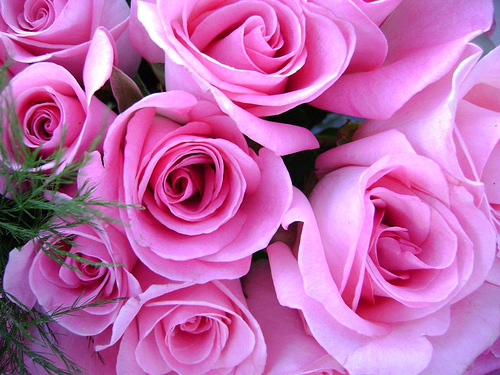

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

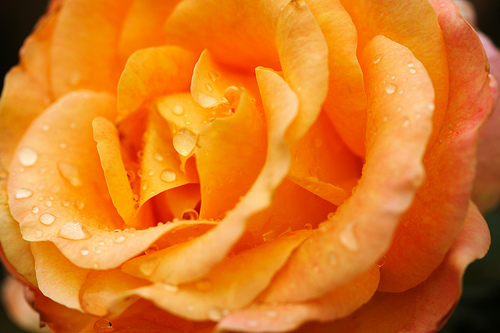

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
def show_images(gen):
    g_dict = gen.class_indices
    classes = list(g_dict.keys())
    images, labels = next(gen)
    plt.figure(figsize= (20, 20))
    length = len(labels)
    sample = min(length, 25)
    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

In [ ]:
train_df, valid_df, test_df = create_df(train_dir, val_dir)

In [ ]:
# train_df.labels.value_counts()

In [ ]:
# valid_df.labels.value_counts()

In [ ]:
# test_df.labels.value_counts()

In [ ]:
# # Get Generators
batch_size = 40
train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

# show_images(train_gen)

Found 25910 validated image filenames belonging to 11 classes.
Found 3342 validated image filenames belonging to 11 classes.
Found 3342 validated image filenames belonging to 11 classes.


In [ ]:
# Check how many images are in each folder, read through each folder and count the number of images in it
for disease in os.listdir(train_dir):
    disease_dir = os.path.join(train_dir, disease)
    image_list = os.listdir(disease_dir)
    print(disease + ': ' + str(len(image_list)))

Bacterial_spot: 2826
Early_blight: 2514
Late_blight: 3113
Leaf_Mold: 2754
Septoria_leaf_spot: 2882
Spider_mites Two-spotted_spider_mite: 1747
Target_Spot: 1827
Tomato_Yellow_Leaf_Curl_Virus: 2039
Tomato_mosaic_virus: 2153
healthy: 3051
powdery_mildew: 1004


In [ ]:
for disease in os.listdir(train_dir):
    disease_dir = os.path.join(val_dir, disease)
    image_list = os.listdir(disease_dir)
    print(disease + ': ' + str(len(image_list)))

Bacterial_spot: 732
Early_blight: 643
Late_blight: 792
Leaf_Mold: 739
Septoria_leaf_spot: 746
Spider_mites Two-spotted_spider_mite: 435
Target_Spot: 457
Tomato_Yellow_Leaf_Curl_Virus: 498
Tomato_mosaic_virus: 584
healthy: 806
powdery_mildew: 252


In [ ]:
train_df.filepaths[0]

'/content/drive/My Drive/Colab Notebooks/MMAI 894/Dataset/train/Bacterial_spot/Bs69_change_180.jpg'

In [ ]:
train_gen

AttributeError: ignored